# Kaggle Titanic Tutorials
https://www.kaggle.com/daehungwak/guide-kor-dg

## Load Data

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

plt.style.use('seaborn')
sns.set(font_scale=2.5) # 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore') # 워닝 메세지를 생략해 줍니다. 차후 버전관리를 위해 필요한 정보라고 생각하시면 주석처리 하시면 됩니다.

%matplotlib inline

In [3]:
os.listdir("../input/")

['test.csv', 'train.csv', 'gender_submission.csv']

In [4]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')
df_submit = pd.read_csv('../input/gender_submission.csv')

In [5]:
df_train.shape, df_test.shape, df_submit.shape

((891, 12), (418, 11), (418, 2))

In [6]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df_submit.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Data Feature
**타이타닉 데이터 Feature 설명**
- survival - 생존유무, target 값. (0 = 사망, 1 = 생존)
- pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex - 성별
- Age - 나이(세)
- sibsp - 함께 탑승한 형제자매, 배우자 수 총합
- parch - 함께 탑승한 부모, 자녀 수 총합
- ticket - 티켓 넘버
- fare - 탑승 요금
- cabin - 객실 넘버
- bembarked - 탑승 항구

In [11]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
# pandas dataframe 에는 describe() 메소드가 있는 데, 이를 쓰면 각 feature 가 가진 통계치들을 반환해줍니다.
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Null Data Check

In [14]:
df_train.shape[0]

891

In [15]:
df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [16]:
df_test.isnull().sum() / df_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

train set과 test set에 비슷하게 Age 피쳐에 약 20%, Cabin 피쳐에 약 80%의
결측치가 있음을 확인할 수 있습니다.

## Target Label, Survived 확인

target label 이 어떤 distribution 을 가지고 있는 지 확인해봐야 합니다.    
지금 같은 binary classification 문제의 경우에서,    
1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있습니다.

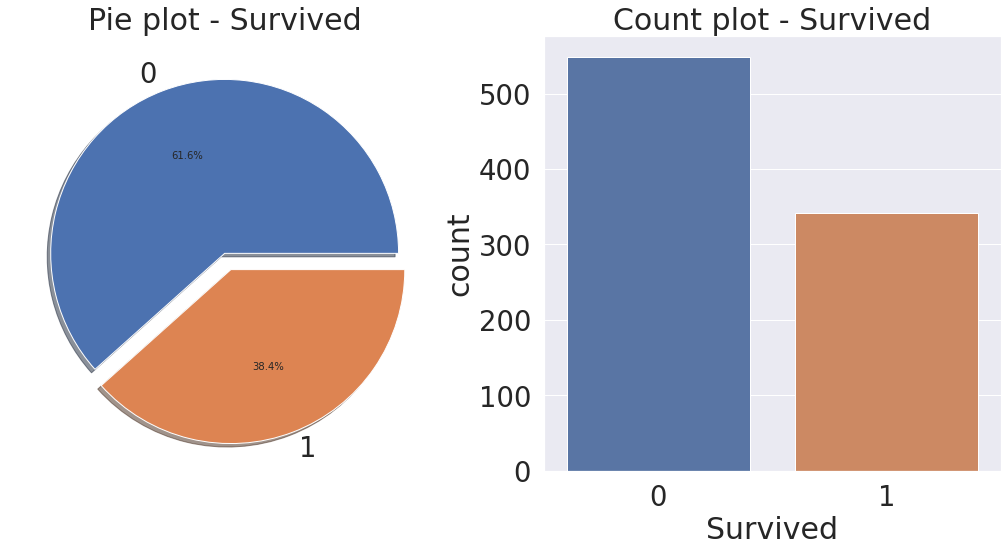

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

target label 의 분포가 제법 균일(balanced)합니다.    
불균일한 경우, 예를 들어서 100중 1이 99, 0이 1개인 경우에는    
만약 모델이 모든것을 1이라 해도 정확도가 99%가 나오게 됩니다.    
0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 됩니다.    
지금 문제에서는 그렇지 않으니 계속 진행하겠습니다.

# 탐색적 데이터 분석 (EDA, Exploratory Data Analysis)

## Pcalss
먼저 Pclass 에 대해서 살펴보겠습니다.

- Pclass는 서수형 데이터입니다.    
즉, 카테고리이면서 순서가 있는 데이터 타입입니다.   
먼저 Pclass 에 따른 생존률의 차이를 살펴보겠습니다.  


- 엑셀의 피벗 차트와 유사한 작업을 하게 되는데,    
pandas dataframe 에서는 groupby 를 사용하면 쉽게 할 수 있습니다.    
또한 pivot 이라는 메소드도 있습니다.    


- Pclass,Survived 를 가져온 후, pclass 로 묶습니다.    
그러고 나면 각 pclass 마다 0, 1 이 count가 되는데,    
이를 평균내면 각 pclass 별 생존률이 나옵니다    


- 아래와 같이 count() 를 하면, 각 class 에 몇명이 있는 지    
확인할 수 있으며, sum() 을 하면, 216 명중 생존한(survived=1)    
사람의 총합을 주게 됩니다

In [18]:
# pclass 그룹 별 데이터 카운트
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [19]:
# pclass 그룹 별 생존자 수 합
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [20]:
# 위와 같은 작업을 crosstab으로 편하게 할 수 있습니다.
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [21]:
# mean은 생존률을 구하게 할 수 있습니다.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


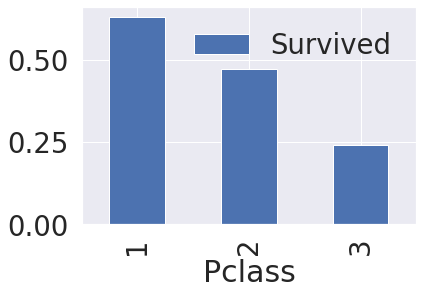

In [22]:
# 이를 시각화 해보았습니다.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

## Sex

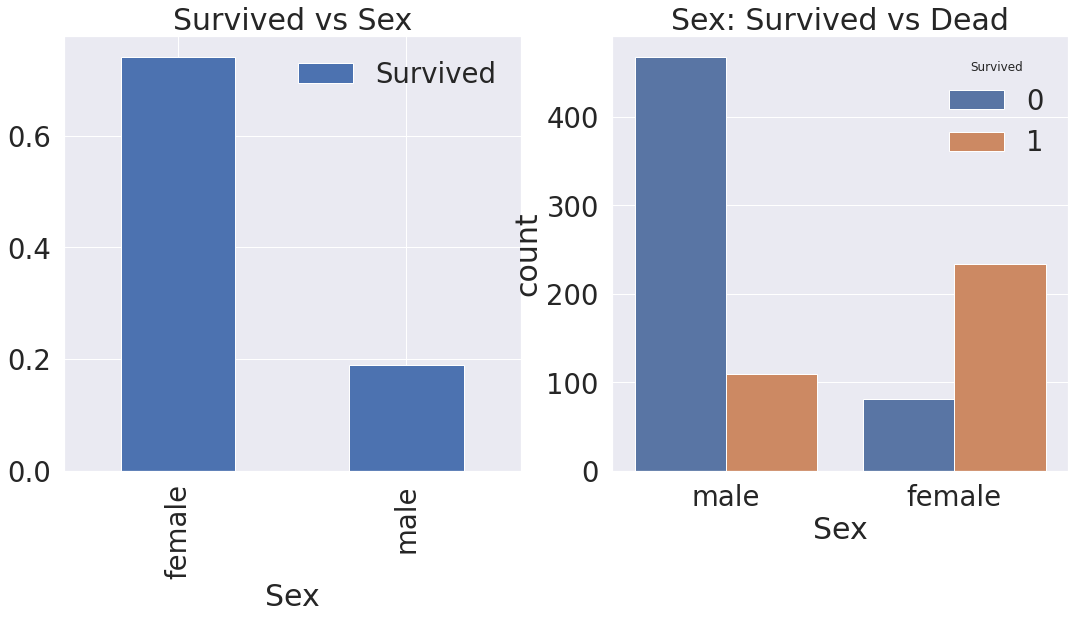

In [23]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

## Both Sex and Pclass

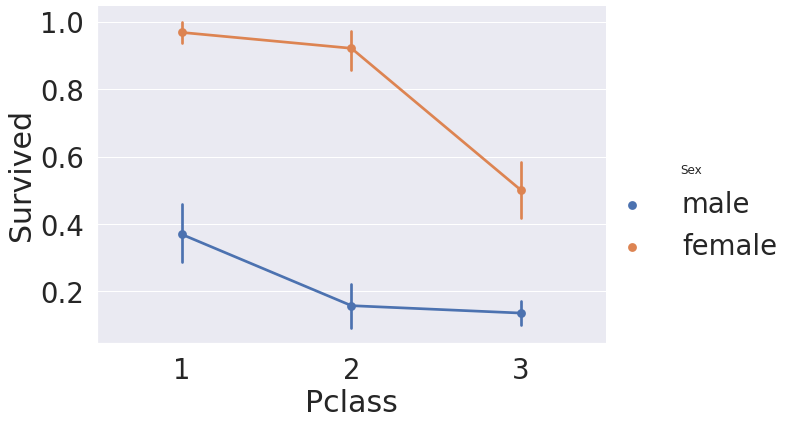

In [24]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, 
               size=6, aspect=1.5)

## Age

In [25]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


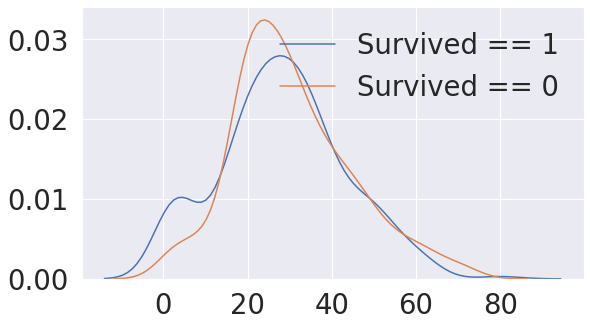

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

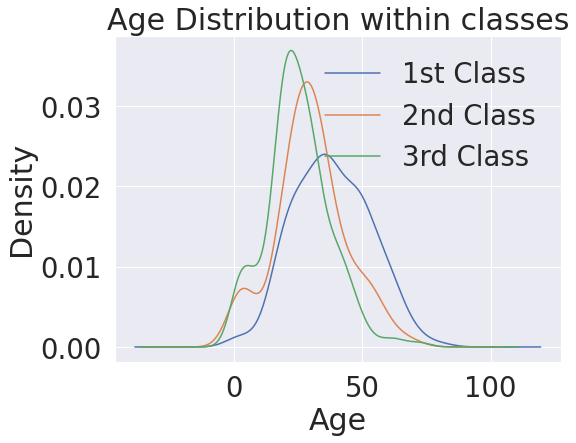

In [27]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

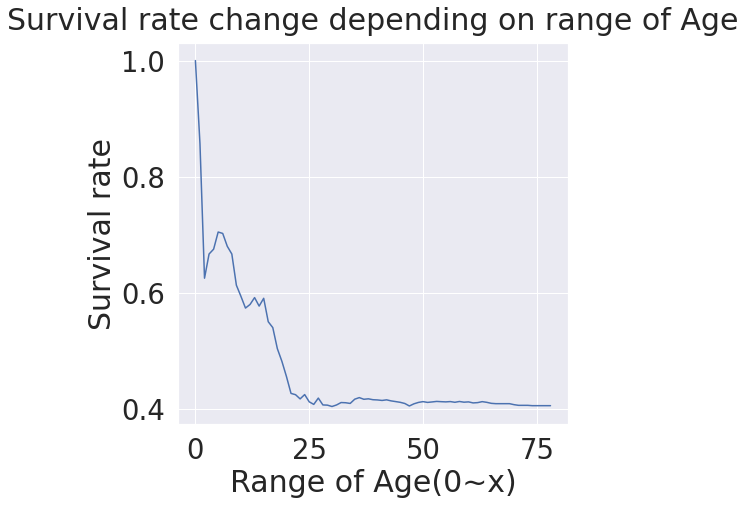

In [28]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

지금까지 얻은 분석을 종합하자면,

- 여자이거나
- 나이가 어리고,
- 클래스가 높을 수록

생존확률이 높음을 확인할 수 있습니다.

## Embarked
탑승한 항구

In [29]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

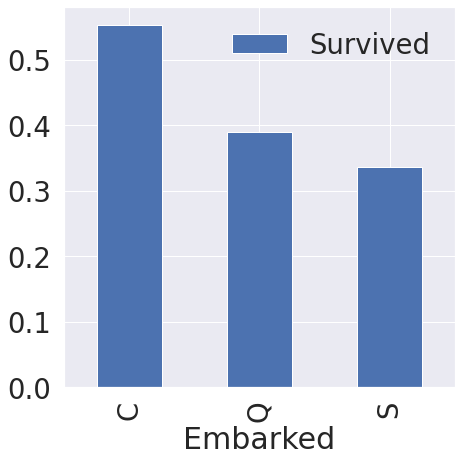

In [30]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

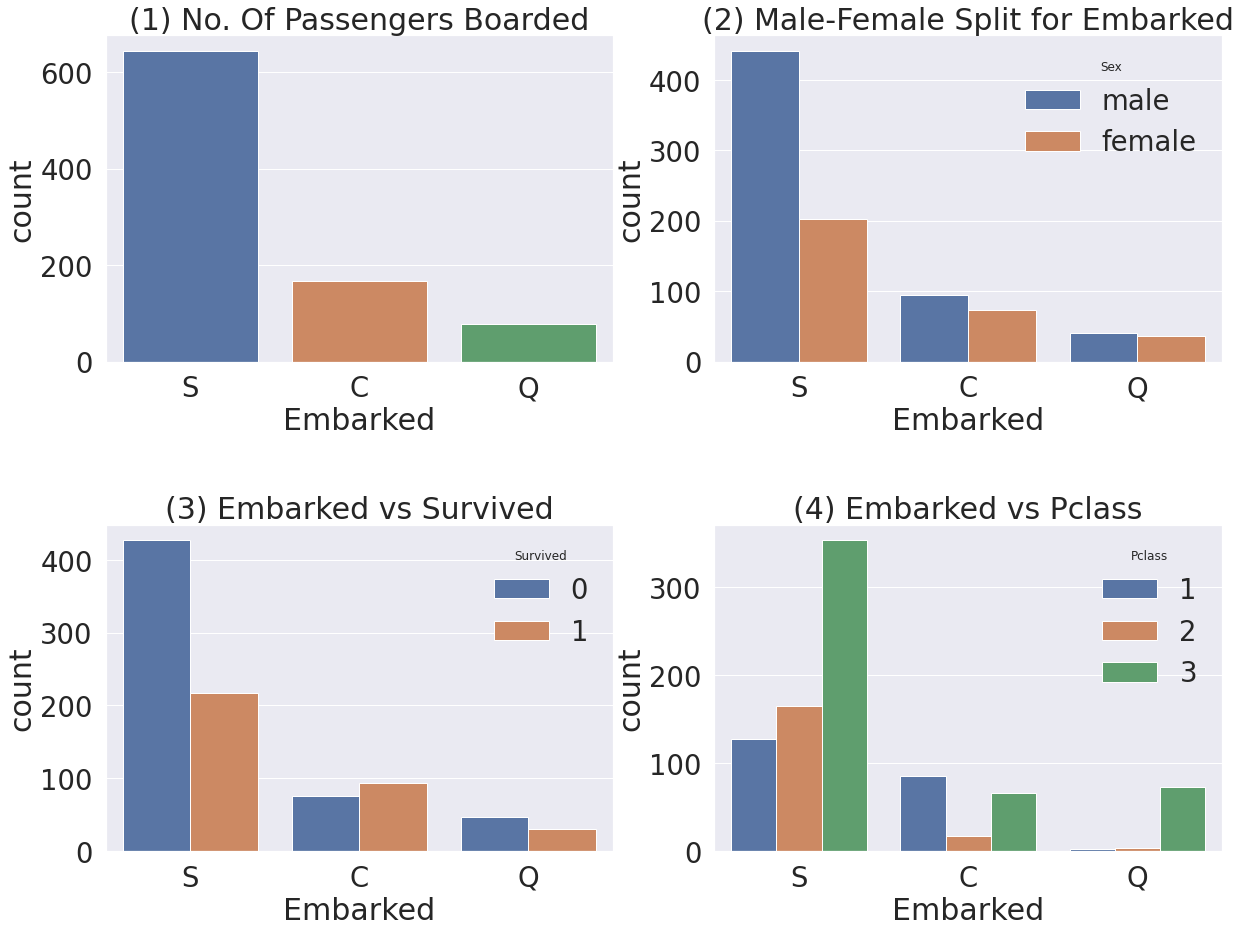

In [31]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure(1) - 전체적으로 봤을 때, S 에서 가장 많은 사람이 탑승했습니다.
- Figure(2) - C와 Q 는 남녀의 비율이 비슷하고, S는 남자가 더 많습니다.
- Figure(3) - 생존확률이 S 경우 많이 낮은 걸 볼 수 있습니다. (이전 그래프에서 봤었습니다)
- Figure(4) - Class 로 split 해서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그렇습니다. S는     3rd class 가 많아서 생존확률이 낮게 나옵니다.

## Family - SibSp(형제 자매) + Parch(부모, 자녀)
SibSp와 Parch를 합치면 함께 탑승한 가족의 수가 될 것입니다.    
이 두 피쳐를 더해서 새로운 피쳐 FamilySize를 만들어 보도록 하겠습니다.    
(사실 새로운 피쳐를 만들어 내는 건 특성 공학쪽에서 다뤄야 하지만 일단 미리 보겠습니다.)    

In [32]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 
# 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 
# 자신을 포함해야하니 1을 더합니다
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


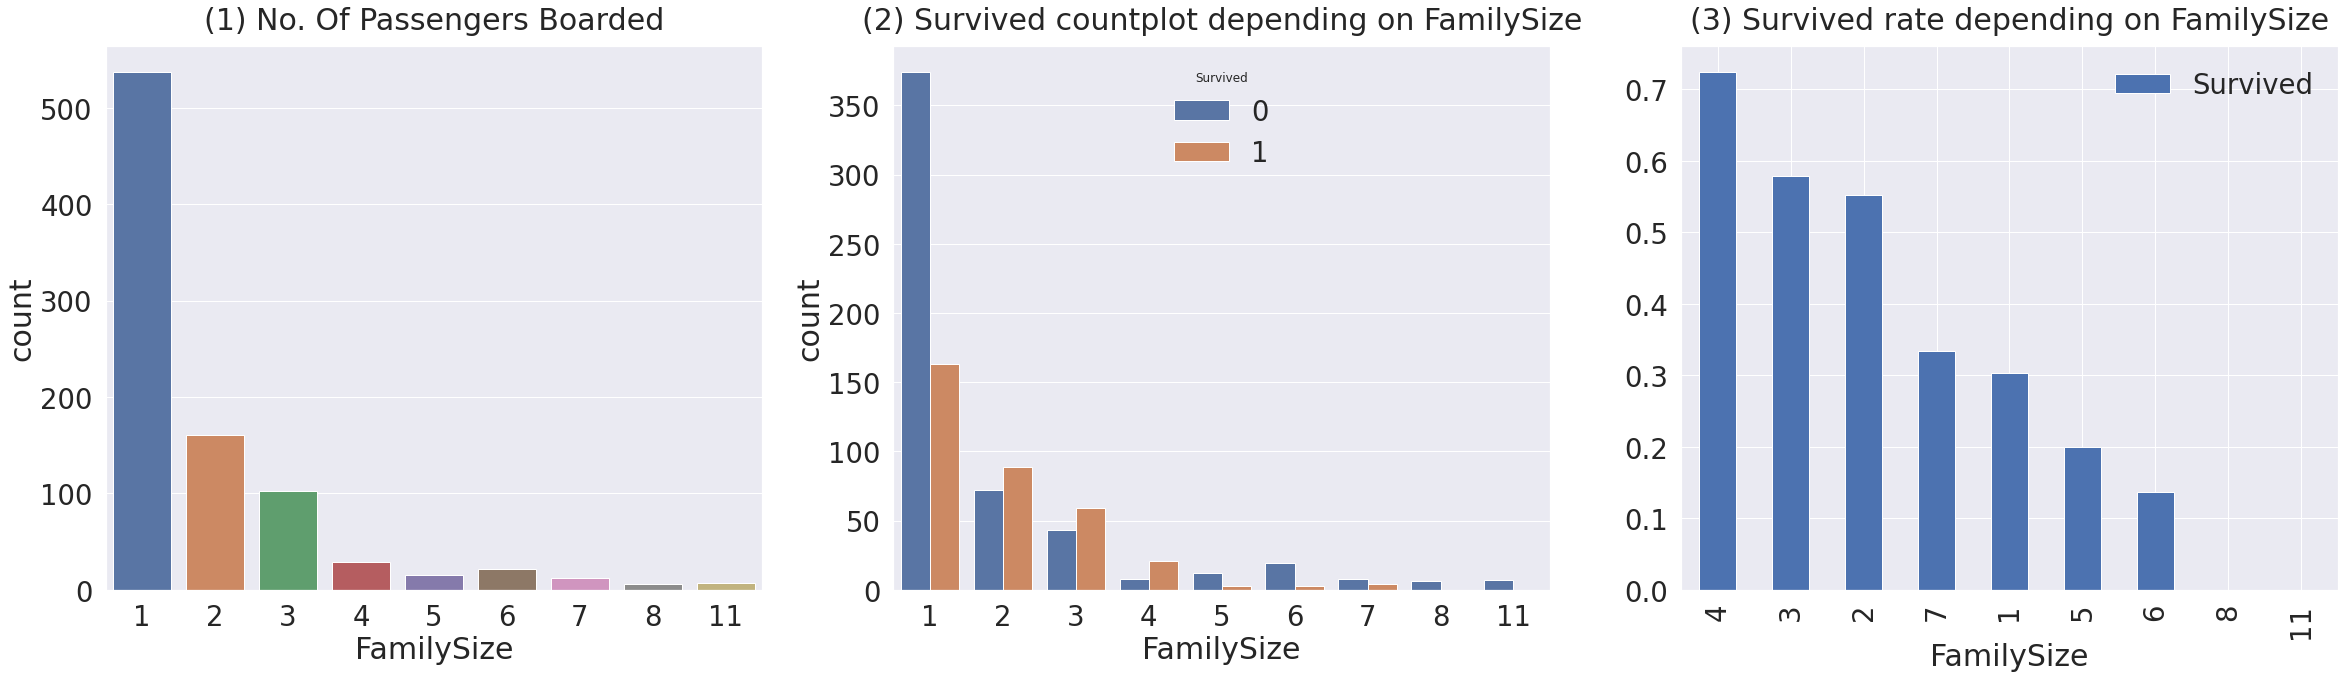

In [33]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure (1) - 가족크기가 1~11까지 있음을 볼 수 있습니다. 대부분 1명이고 그 다음으로 2, 3, 4명입니다.
- Figure (2), (3) - 가족 크기에 따른 생존비교입니다. 가족이 4명인 경우가 가장 생존확률이 높습니다,
가족수가 많아질수록, (5, 6, 7, 8, 11) 생존확률이 낮아지네요.
가족수가 너무 작아도(1), 너무 커도(5, 6, 8, 11) 생존 확률이 작네요. 3~4명 선에서 생존확률이 높은 걸 확인할 수 있습니다.

## Fare
해당 피쳐는 탑승 요금입니다. 연속적인 데이터이므로 한번 histogram을 그려보도록 하겠습니다

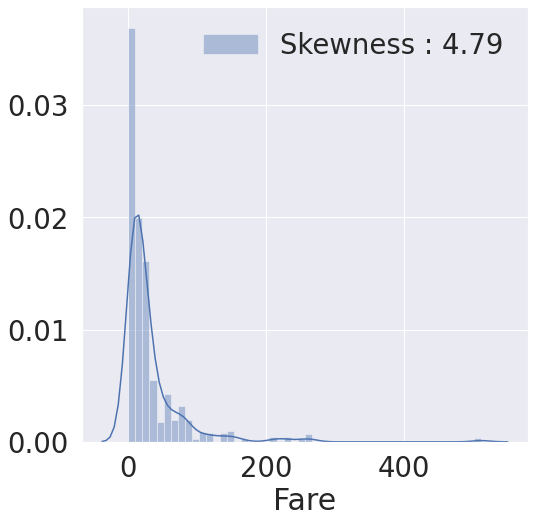

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [35]:
# 특이하기도 train set 말고 test set에 Fare 피쳐에 널 값이 하나 존재하는 것을 확인할 수 있었습니다.
# 그래서 평균 값으로 해당 널값을 넣어줍니다.
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

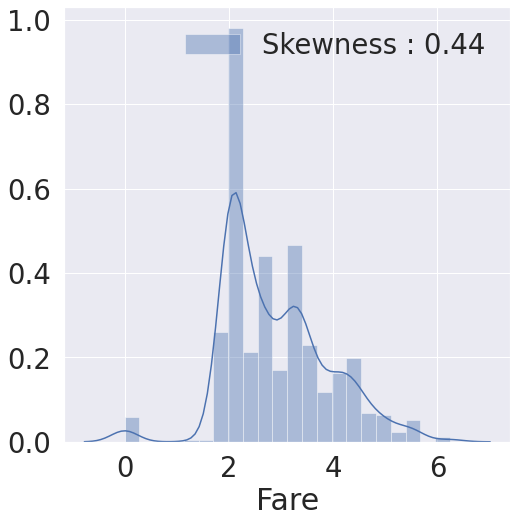

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

log 를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있습니다.    
우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다.    
사실 방금한 것은 feature engineering 에 들어가는 부분인데, 여기서 작업했습니다.    
모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나,    
새로운 feature를 추가하는 것을 feature engineering 이라고 하는데,    
우리는 다음 챕터에 그것을 살펴볼 것입니다.    

## Cabin
이 feature 는 NaN 이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않습니다.    
그러므로 우리가 세우려는 모델에 포함시키지 않도록 하겠습니다.

In [37]:
### Cabin 피쳐의 Null 비율 계산
df_train["Cabin"].isnull().sum() / df_train.shape[0]

0.7710437710437711

In [38]:
df_train.head()[["PassengerId", "Cabin"]]

,PassengerId,Cabin
0,1,NaN
1,2,C85
2,3,NaN
3,4,C123
4,5,NaN


## Ticket

이 feature 는 NaN 은 없습니다. 일단 string data 이므로 우리가 어떤 작업들을 해주어야    
실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요합니다

In [39]:
df_train['Ticket'].value_counts()

1601        7
CA. 2343    7
347082      7
3101295     6
CA 2144     6
           ..
349217      1
250651      1
31418       1
2649        1
693         1
Name: Ticket, Length: 681, dtype: int64

# 특성 공학 (Feature Engineering)

본격적인 feature engineering 을 시작해보겠습니다.


"Garbage In, Garbage out"


특성 공학을 통해 다양 피쳐를 만드시고, 정제하실 텐데    
자기가 생각한 가정이 항상 타당한지 생각하시고 진행해 주시길 바랍니다!    
아무리 좋은 모델도, 안좋은 데이터가 들어오면 안좋은 결과로 나오기 마련이니까요.    

가장 먼저, dataset 에 존재하는 null data를 채우려고 합니다.    
아무 숫자로 채울 수는 없고, null data 를 포함하는 feature 의 statistics 를 참고하거나,    
다른 아이디어를 짜내어 채울 수 있습니다.    

null data 를 어떻게 채우느냐에 따라 모델의 성능이 좌지우지될 수 있기 때문에, 신경써줘야할 부분입니다.    

특히, Feature engineering 은 실제 모델의 학습에 쓰려고 하는 것이므로,    
**train 뿐만 아니라 test 도 똑같이 적용**해주어야 합니다. 잊지맙시다.    

## Fill Null

### Fill Null in Age using title

In [40]:
df_train["Age"].isnull().sum()

177

여기서 우리는 **title + statistics** 를 사용해 보겠습니다.    

영어에서는 **Miss, Mrr, Mrs 같은 title**이 존재합니다.    
각 탑승객의 이름에는 꼭 이런 title 이 들어가게 되는데 이를 사용해보겠습니다.    

pandas series 에는 data 를 string 으로 바꿔주는 `str` method,    
거기에 정규표현식을 적용하게 해주는 `extract` method가 있습니다.    
이를 사용하여 title 을 쉽게 추출할 수 있습니다. title을 `Initial` column에 저장하겠습니다    

In [41]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [42]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [43]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [44]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


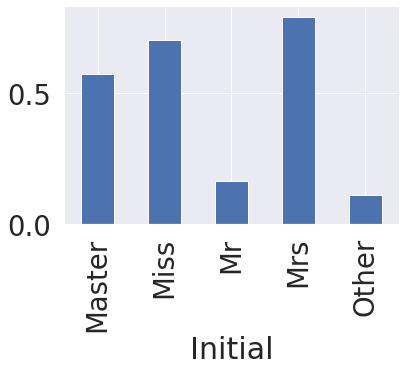

In [45]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

이제 본격적으로 Null 을 채울 것입니다. null data 를 채우는 방법은 정말 많이 존재합니다.     
statistics 를 활용하는 방법도 있고, null data 가 없는 데이터를    
기반으로 새로운 머신러닝 알고리즘을 만들어 예측해서 채워넣는 방식도 있습니다.    
(딥러닝에서 디노이징 오토인코더 라는 것이 있습니다!)    

여기서는 statistics 를 활용하는 방법을 사용할 것입니다.    
여기서 statistics 는 train data 의 것을 의미합니다.    
우리는 언제나 test 를 unseen 으로 둔 상태로 놔둬야 하며,    
train 에서 얻은 statistics 를 기반으로 test 의 null data 를 채워줘야 합니다.    

In [46]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [47]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [48]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin       687
Embarked      2
dtype: int64

In [49]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

Cabin    327
dtype: int64

다양한 예시
https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling

### Fill Null in Embarked

In [50]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


Embarked 는 Null value 가 2개이고, S 에서 가장 많은 탑승객이 있었으므로,    
간단하게 Null 을 S로 채우겠습니다.    
dataframe 의 fillna method 를 이용하면 쉽게 채울 수 있습니다.    
여기서 inplace=True 로 하면 df_train 에 fillna 를 실제로 적용하게 됩니다.    

In [51]:
df_train['Embarked'].fillna('S', inplace=True)

In [52]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin    687
dtype: int64

## Change Age(continuous to categorical)

In [53]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [54]:
df_train.groupby(['Age_cat'])['PassengerId'].count()

Age_cat
0     66
1    102
2    256
3    304
4     89
5     48
6     19
7      7
Name: PassengerId, dtype: int64

In [55]:
df_train.groupby(['Age_cat']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
Age_cat,,,,,,,,,,,,,,
0,66,66,66,66,66,66,66,66,66,66,10,66,66,66
1,102,102,102,102,102,102,102,102,102,102,19,102,102,102
2,256,256,256,256,256,256,256,256,256,256,38,256,256,256
3,304,304,304,304,304,304,304,304,304,304,67,304,304,304
4,89,89,89,89,89,89,89,89,89,89,33,89,89,89
5,48,48,48,48,48,48,48,48,48,48,24,48,48,48
6,19,19,19,19,19,19,19,19,19,19,10,19,19,19
7,7,7,7,7,7,7,7,7,7,7,3,7,7,7


이제 파생 피쳐를 만들었으므로 원래 컬럼 Age 를 제거하는게 맞겠지만,    
저희는 상관 관계가 높아도 모델의 설명력(성능)에 도움이 될 수 있으니    
남겨 보도록 하겠습니다.

## Change Initial, Embarked and Sex (string to numerical)

현재 Initial 은 Mr, Mrs, Miss, Master, Other 총 5개로 이루어져 있습니다.    
이런 카테고리로 표현되어져 있는 데이터를 모델에 인풋으로 넣어줄 때    
우리가 해야할 것은 먼저 **컴퓨터가 인식할 수 있도록 수치화** 시켜야 합니다.     
`map` method 를 가지고 간단히 할 수 있습니다.    
사전 순서대로 정리하여 mapping 하겠습니다

In [56]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [57]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [58]:
df_train['Embarked'].isnull().any() , df_train['Embarked'].dtypes

(False, dtype('int64'))

In [59]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,2,1,2,3


In [60]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [61]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,2,1,2,3


### 상관관계 구하기

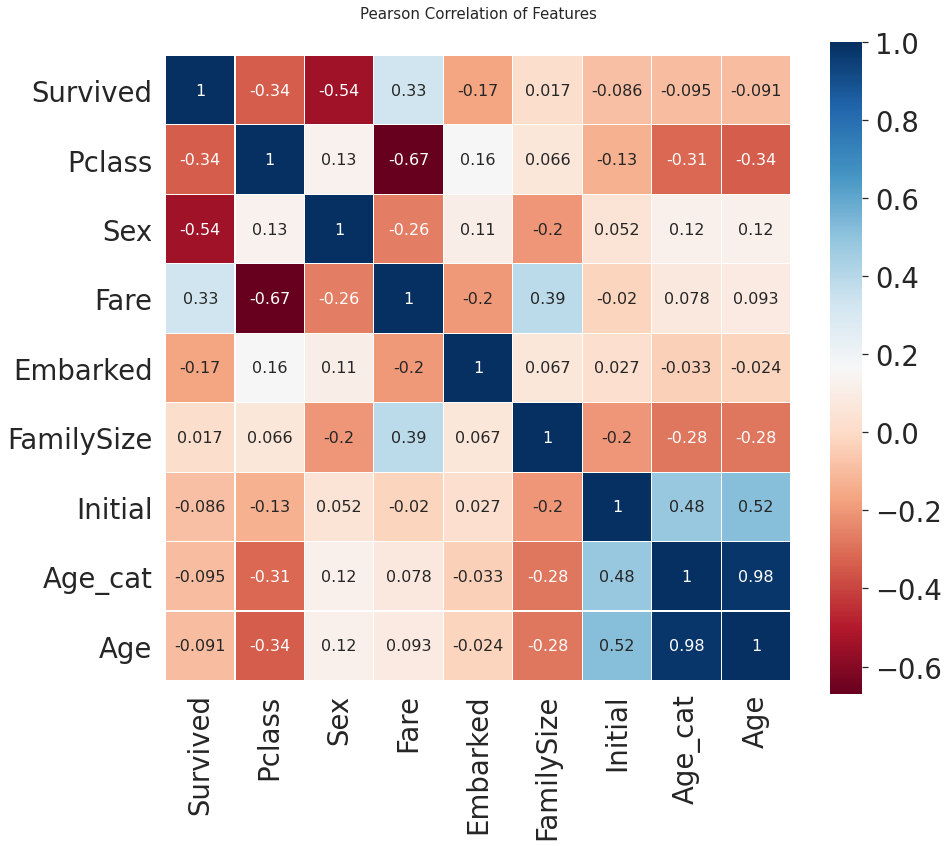

In [62]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat', 'Age']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

우리가 EDA에서 살펴봤듯이,    
Sex 와 Pclass 가 Survived 에 상관관계가 어느 정도 있음을 볼 수 있습니다.    

생각보다 fare 와 Embarked 도 상관관계가 있음을 볼 수 있습니다.    

또한 우리가 여기서 얻을 수 있는 정보는    
서로 강한 상관관계를 가지는 feature들이 없다는 것입니다.    
(Age와 Age_cat 제외..)    
이것은 우리가 모델을 학습시킬 때, 불필요한 feature 가 없다는 것을 의미합니다.    
**1 또는 -1 의 상관관계를 가진 feature A, B 가 있다면, 우리가 얻을 수 있는 정보는 사실 하나일 거니까요.**     

이제 실제로 모델을 학습시키기 앞서서 data preprocessing (전처리)을 진행해보겠습니다.

## One-hot encoding on Initial and Embarked

In [63]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [64]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [65]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

아주 쉽게 one-hot encoding 을 적용했습니다.    
다른 패키지로도 원핫 인코딩을 적용 시킬 수 있지만, 여기에선 다루지 않겠습니다.    

Tips: 가끔 category 가 100개가 넘어가는 경우가 있습니다.    
이때 one-hot encoding을 사용하면 column이 100개가 생겨,    
학습시 매우 버거울 경우가 있습니다. (차원의 저주라고 부르기도 합니다.)    

이런 경우는 다른 방법을 사용하기도 하는데, 이는 나중에 다른 컴피티션 참가하시면    
차원의 저주 키워드로 해결 방법을 모색하시길 바랍니다!    

## Drop columns

In [67]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [68]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,38.0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,26.0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,35.0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,35.0,2.085672,1,3,0,0,1,0,0,0,0,1


In [69]:
df_train.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

In [70]:
df_test.head()

,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,47.0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,62.0,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,27.0,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,22.0,2.508582,3,2,0,0,0,1,0,0,0,1


In [71]:
df_test.dtypes

Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

# 모델 개발 및 학습

지금 타이타닉 문제는 target class(survived)가 있으며, target class 는 0, 1로 이루어져 있으므로(binary)    
**binary classfication** 문제입니다.

In [72]:
#importing all the required ML packages
from sklearn.ensemble import RandomForestClassifier # 유명한 randomforestclassfier 입니다. 
from sklearn import metrics # 모델의 평가를 위해서 씁니다
from sklearn.model_selection import train_test_split # traning set을 쉽게 나눠주는 함수입니다.

## Preparation - Split dataset into train, valid(dev), test set

In [73]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [74]:
X_train.shape, X_test.shape

((891, 14), (418, 14))

In [75]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.2, random_state=2018)

In [76]:
y_tr.shape, y_vld.shape

((712,), (179,))

## Model generation and prediction

In [77]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [78]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 179명 중 81.01% 정확도로 생존을 맞춤


학습된 모델은 feature importance 를 가지게 되는데,    
우리는 이것을 확인하여 지금 만든 모델이 어떤 feature 에 영향을 많이 받았는 지 확인할 수 있습니다.    

쉽게 말해, `y = 4*x1 + 2*x2 + 1*x3` 을 생각하면,    
우리는 x1이 결과값(10)에 큰 영향을 준다고 생각 할 수 있습니다.    

feature importance 는 4, 2, 1 을 이야기하며, x1이 가장 큰 값(4)를 가지므로,    
이 모델에 x1 피쳐가 가장 큰 영향을 미친다고 말할 수 있습니다.    

학습된 모델은 기본적으로 feature importances 를 가지고 있어서 쉽게 그 수치를 얻을 수 있습니다.     
pandas series 를 이용하면 쉽게 sorting 을 하여 그래프를 그릴 수 있습니다.    

In [79]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

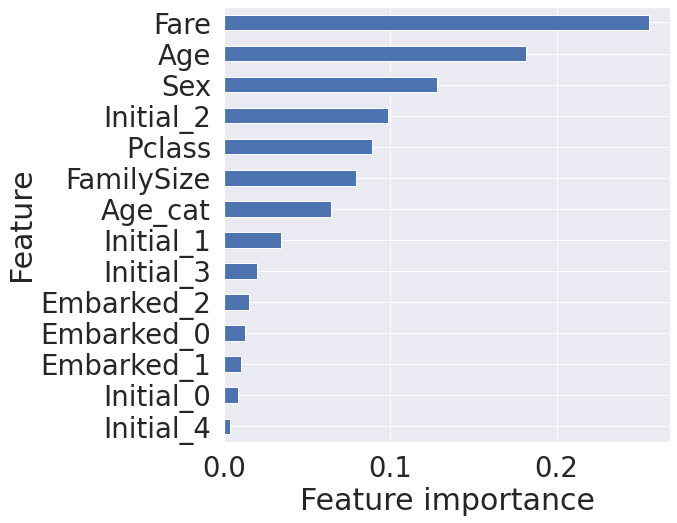

In [80]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

## Keras를 사용한 NN 모델 개발

In [81]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import Adam, SGD
nn_model = Sequential()
nn_model.add(Dense(32,activation='relu',input_shape=(14,)))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(64,activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(32,activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(1,activation='sigmoid'))

Loss = 'binary_crossentropy'
nn_model.compile(loss=Loss,optimizer=Adam(),metrics=['accuracy'])
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                480       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3

In [82]:
history = nn_model.fit(X_tr,y_tr,
                    batch_size=64,
                    epochs=500,
                    validation_data=(X_vld, y_vld),
                    verbose=1)

Epoch 1/500
12/12 [==============================] - 0s 12ms/step - loss: 1.4153 - accuracy: 0.5351 - val_loss: 0.9125 - val_accuracy: 0.6480
Epoch 2/500
12/12 [==============================] - 0s 3ms/step - loss: 1.0833 - accuracy: 0.5407 - val_loss: 0.6367 - val_accuracy: 0.6536
Epoch 3/500
12/12 [==============================] - 0s 3ms/step - loss: 0.9215 - accuracy: 0.5169 - val_loss: 0.6460 - val_accuracy: 0.6592
Epoch 4/500
12/12 [==============================] - 0s 3ms/step - loss: 0.8411 - accuracy: 0.5702 - val_loss: 0.6355 - val_accuracy: 0.6592
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 0.7966 - accuracy: 0.5492 - val_loss: 0.6371 - val_accuracy: 0.6592
Epoch 6/500
12/12 [==============================] - 0s 3ms/step - loss: 0.7342 - accuracy: 0.5463 - val_loss: 0.6392 - val_accuracy: 0.6480
Epoch 7/500
12/12 [==============================] - 0s 4ms/step - loss: 0.7150 - accuracy: 0.5758 - val_loss: 0.6353 - val_accuracy: 0.6536
Epoch 8/500


Epoch 59/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4755 - accuracy: 0.7837 - val_loss: 0.4038 - val_accuracy: 0.8380
Epoch 60/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4657 - accuracy: 0.8076 - val_loss: 0.4037 - val_accuracy: 0.8380
Epoch 61/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4683 - accuracy: 0.8076 - val_loss: 0.3902 - val_accuracy: 0.8715
Epoch 62/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4815 - accuracy: 0.7935 - val_loss: 0.3961 - val_accuracy: 0.8715
Epoch 63/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4470 - accuracy: 0.8118 - val_loss: 0.3954 - val_accuracy: 0.8492
Epoch 64/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4707 - accuracy: 0.7978 - val_loss: 0.3942 - val_accuracy: 0.8659
Epoch 65/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4614 - accuracy: 0.8104 - val_loss: 0.4003 - val_accuracy: 0.8715
Epoch 

12/12 [==============================] - 0s 3ms/step - loss: 0.4188 - accuracy: 0.8202 - val_loss: 0.3871 - val_accuracy: 0.8547
Epoch 117/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4324 - accuracy: 0.7978 - val_loss: 0.3855 - val_accuracy: 0.8547
Epoch 118/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4409 - accuracy: 0.8076 - val_loss: 0.3803 - val_accuracy: 0.8603
Epoch 119/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4520 - accuracy: 0.7992 - val_loss: 0.3885 - val_accuracy: 0.8547
Epoch 120/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4229 - accuracy: 0.8062 - val_loss: 0.3804 - val_accuracy: 0.8547
Epoch 121/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4181 - accuracy: 0.8258 - val_loss: 0.3849 - val_accuracy: 0.8603
Epoch 122/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4422 - accuracy: 0.8258 - val_loss: 0.3896 - val_accuracy: 0.8603
Epoch 123/500

12/12 [==============================] - 0s 4ms/step - loss: 0.4094 - accuracy: 0.8244 - val_loss: 0.3874 - val_accuracy: 0.8492
Epoch 174/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4163 - accuracy: 0.8315 - val_loss: 0.3826 - val_accuracy: 0.8380
Epoch 175/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8371 - val_loss: 0.3790 - val_accuracy: 0.8436
Epoch 176/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8244 - val_loss: 0.3802 - val_accuracy: 0.8492
Epoch 177/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4046 - accuracy: 0.8315 - val_loss: 0.3912 - val_accuracy: 0.8492
Epoch 178/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4092 - accuracy: 0.8258 - val_loss: 0.3874 - val_accuracy: 0.8436
Epoch 179/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4098 - accuracy: 0.8230 - val_loss: 0.3844 - val_accuracy: 0.8436
Epoch 180/500

12/12 [==============================] - 0s 4ms/step - loss: 0.3993 - accuracy: 0.8287 - val_loss: 0.3807 - val_accuracy: 0.8436
Epoch 231/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3891 - accuracy: 0.8244 - val_loss: 0.3762 - val_accuracy: 0.8436
Epoch 232/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4142 - accuracy: 0.8216 - val_loss: 0.3772 - val_accuracy: 0.8380
Epoch 233/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3992 - accuracy: 0.8343 - val_loss: 0.3803 - val_accuracy: 0.8380
Epoch 234/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4019 - accuracy: 0.8230 - val_loss: 0.3784 - val_accuracy: 0.8492
Epoch 235/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3849 - accuracy: 0.8258 - val_loss: 0.3790 - val_accuracy: 0.8380
Epoch 236/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8301 - val_loss: 0.3813 - val_accuracy: 0.8436
Epoch 237/500

12/12 [==============================] - 0s 4ms/step - loss: 0.3918 - accuracy: 0.8244 - val_loss: 0.3787 - val_accuracy: 0.8436
Epoch 288/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3861 - accuracy: 0.8343 - val_loss: 0.3822 - val_accuracy: 0.8380
Epoch 289/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4031 - accuracy: 0.8188 - val_loss: 0.3804 - val_accuracy: 0.8324
Epoch 290/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3990 - accuracy: 0.8343 - val_loss: 0.3791 - val_accuracy: 0.8324
Epoch 291/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3934 - accuracy: 0.8329 - val_loss: 0.3827 - val_accuracy: 0.8380
Epoch 292/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3823 - accuracy: 0.8385 - val_loss: 0.3798 - val_accuracy: 0.8436
Epoch 293/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3847 - accuracy: 0.8343 - val_loss: 0.3819 - val_accuracy: 0.8380
Epoch 294/500

12/12 [==============================] - 0s 4ms/step - loss: 0.3840 - accuracy: 0.8427 - val_loss: 0.3809 - val_accuracy: 0.8380
Epoch 345/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3776 - accuracy: 0.8343 - val_loss: 0.3797 - val_accuracy: 0.8380
Epoch 346/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3894 - accuracy: 0.8272 - val_loss: 0.3825 - val_accuracy: 0.8380
Epoch 347/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3768 - accuracy: 0.8385 - val_loss: 0.3863 - val_accuracy: 0.8436
Epoch 348/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3977 - accuracy: 0.8357 - val_loss: 0.3841 - val_accuracy: 0.8324
Epoch 349/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3815 - accuracy: 0.8385 - val_loss: 0.3801 - val_accuracy: 0.8324
Epoch 350/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3769 - accuracy: 0.8399 - val_loss: 0.3806 - val_accuracy: 0.8436
Epoch 351/500

12/12 [==============================] - 0s 3ms/step - loss: 0.3937 - accuracy: 0.8287 - val_loss: 0.3834 - val_accuracy: 0.8324
Epoch 402/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3691 - accuracy: 0.8469 - val_loss: 0.3835 - val_accuracy: 0.8324
Epoch 403/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3777 - accuracy: 0.8357 - val_loss: 0.3837 - val_accuracy: 0.8324
Epoch 404/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3897 - accuracy: 0.8343 - val_loss: 0.3856 - val_accuracy: 0.8380
Epoch 405/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3854 - accuracy: 0.8287 - val_loss: 0.3935 - val_accuracy: 0.8324
Epoch 406/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3796 - accuracy: 0.8272 - val_loss: 0.3857 - val_accuracy: 0.8380
Epoch 407/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3780 - accuracy: 0.8413 - val_loss: 0.3865 - val_accuracy: 0.8380
Epoch 408/500

12/12 [==============================] - 0s 3ms/step - loss: 0.3523 - accuracy: 0.8441 - val_loss: 0.3852 - val_accuracy: 0.8436
Epoch 459/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3645 - accuracy: 0.8427 - val_loss: 0.3813 - val_accuracy: 0.8436
Epoch 460/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3645 - accuracy: 0.8469 - val_loss: 0.3830 - val_accuracy: 0.8436
Epoch 461/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3643 - accuracy: 0.8413 - val_loss: 0.3804 - val_accuracy: 0.8436
Epoch 462/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3668 - accuracy: 0.8371 - val_loss: 0.3836 - val_accuracy: 0.8436
Epoch 463/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3818 - accuracy: 0.8399 - val_loss: 0.3860 - val_accuracy: 0.8380
Epoch 464/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3708 - accuracy: 0.8427 - val_loss: 0.3819 - val_accuracy: 0.8380
Epoch 465/500

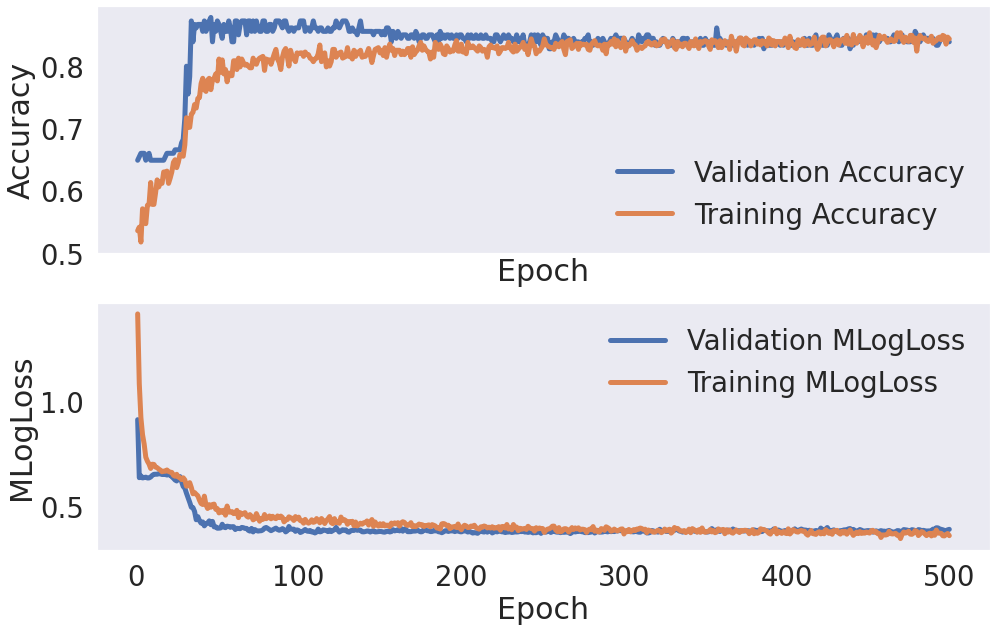

In [85]:
hists = [history]
hist_df = pd.concat([pd.DataFrame(hist.history) for hist in hists], sort=True)
hist_df.index = np.arange(1, len(hist_df)+1)
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(16, 10))
axs[0].plot(hist_df.val_accuracy, lw=5, label='Validation Accuracy')
axs[0].plot(hist_df.accuracy, lw=5, label='Training Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].grid()
axs[0].legend(loc=0)
axs[1].plot(hist_df.val_loss, lw=5, label='Validation MLogLoss')
axs[1].plot(hist_df.loss, lw=5, label='Training MLogLoss')
axs[1].set_ylabel('MLogLoss')
axs[1].set_xlabel('Epoch')
axs[1].grid()
axs[1].legend(loc=0)
fig.savefig('hist.png', dpi=300)
plt.show();

In [87]:
submission = pd.read_csv('../input/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [88]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [89]:
submission.to_csv('my_first_submission.csv', index=False)

In [90]:
submission = pd.read_csv('../input/gender_submission.csv')
prediction = nn_model.predict(X_test)
prediction = prediction > 0.5
prediction = prediction.astype(np.int)
prediction = prediction.T[0]
prediction.shape

(418,)

In [91]:
submission['Survived'] = prediction
submission.to_csv('my_nn_submission.csv', index=False)